# **Test Analytics Engineer**

1.   Esse case é composto de dois datasets no formato csv: ProdutosRetailers.csv e Coletas.csv.
  *  O dataset ProdutosVarejos.csv contém os dados com as informações de produtos e seus fabricantes, bem como dos marketplaces.
  *  Já, o database Coletas.csv contém os dados de coleta de produtos em vários marketplaces diariamente.

2.   CAMPOS:

* ProdutosVarejos:

    .Customer   - Fabricante do produto

    .Department - Departamento do produto

    .Category   - Categoria do produto

    .Brand      - Marca do produto

    .EAN        - Código de identificação do produto

    .Product    - Nome do produto

    .Retailer   - Nome do marketplace

    .MasterKey_RetailerProduct - Chave que considera o marketplace e o produto

* Coletas:

	.DateIns                   - Data de coleta

  .Screenshot                - Screenshot do produto coletado

  .Available                 - Indica se o produto está disponível ou não (1 - disponível; 0 - não disponível)

  .Unavailable               - Indica se o produto não está disponível (1 - não disponível; 0 disponível)

  .SuggestedPrice            - Preço Sugerido de venda para o produto

	.FinalPrice                - Preço de venda coletado no marketplace

	.FromPrice                 - Preço de venda antes do desconto

	.MasterKey_RetailerProduct - Chave que considera o marketplace e o produto


3.    OBJETIVOS:

  *  Realizar o data cleaning nos dois datasets;
  *  Extrair insights;
  *  Implementação de modelo de ML (Plus).


4.    PREMISSAS:

  *  MasterKey_RetailerProduct do database ProdutosVarejos.csv é único;
  *  MasterKey_RetailerProduct do database ProdutosVarejos.csv é único para cada dia;
  *  As coletas são realizadas diariamente, impreterivelmente.


5.    FERRAMENTAS:
    
    *  Utilizar Python ou R;
    *  Disponibilizar os resultados no Github pessoal (apresentação, notebook, código, etc...);
    *  Pode-se utilizar outras ferramentas de visualização caso seja necessário.

# **Importações Iniciais**

In [420]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive
import pickle

sns.set(rc={'figure.figsize':(20,8)})

In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Carregando as base de dados**

In [115]:
#Importando o dataset Coletas.csv a partir do GitHub
df_coletas = pd.read_csv('https://media.githubusercontent.com/media/ricardoramosAscential/test-analytics-engineer/main/Coletas.csv')

In [116]:
#Importando o dataset ProdutosVarejos.csv a partir do GitHub
df_produtos = pd.read_csv('https://media.githubusercontent.com/media/ricardoramosAscential/test-analytics-engineer/main/ProdutosVarejos.csv')

#**Analisando os Dados produtos.csv**

In [117]:
#Analisando as dimensões do ProdutosVarejos.csv
df_produtos.shape

(2146489, 8)

In [118]:
df_produtos.head()

,Customer,Department,Category,Brand,EAN,Product,Retailer,MasterKey_RetailerProduct
0,LG,RAC,Ar Condicionado Residencial,LG,7893299911101,Ar Condicionado Split Cassete LG Quente/Frio 4...,Dufrio,BRLG7893299911101ATNW48GMLP0.ANWTBRZDufrio
1,LG,W/M,Lavadoras de Roupa,LG,FV3011WG4,LAVADORA SMART LG VC5 11KG BRANCA COM INTELIGÊ...,Dufrio,BRLGFV3011WG4FV3011WG4Dufrio
2,LG,W/M,Lavadoras de Roupa,LG,FV3011WG4,LAVADORA SMART LG VC5 11KG BRANCA COM INTELIGÊ...,ClimaRio,BRLGFV3011WG4FV3011WG4ClimaRio
3,Elgin - Ar & Eletro,AR E ELETRO,AR CONDICIONADO,ELGIN,7897013575785(2),Ar Condicionado Piso Teto Eco Elgin 80000 Btus...,MegaMamute,BRElgin - Ar & Eletro7897013575785(2)45PEFI80B...
4,Elgin - Ar & Eletro,AR E ELETRO,AR CONDICIONADO,ELGIN,7897013586620,Ar Condicionado Cassete Plus Elgin 48000 Btus ...,ClimaRio,BRElgin - Ar & Eletro789701358662045KPFI48B2NA...


In [119]:
df_produtos.tail()

,Customer,Department,Category,Brand,EAN,Product,Retailer,MasterKey_RetailerProduct
2146484,Aché,TOPIRAMATO,GENÉRICOS,TOPIRAMATO,7896181900689,TOPIRAMATO 25MG COMR BLX60 (C1),Drogaria SP,BRAché78961819006897896181900689Drogaria SP
2146485,Femsa - Brasil PicOS,Suco,Suco - Multi Serve,Del Valle,7894900611014,Suco Del Valle 100% Uva TP 1L,Rappi Turbo - PR - Champagnat Curitiba,BRFemsa - Brasil PicOS7894900611014118812Rappi...
2146486,Femsa - México PicOS,Ref. Frutales,Ref. Frutales,Sprite,7501055305629,Refresco Sprite Lima-Limón 600mL,Walmart México - Ciudad de Mexico,MXFemsa - México PicOS7501055305629353Walmart ...
2146487,Whirlpool,FREEZER VERTICAL,Freezer,Consul,7891129196209,Freezer Vertical Consul 1 Porta 121L - CVU18GB...,Magazine Luiza,BRWhirlpool7891129196209CVU18GBANAMagazine Luiza
2146488,Whirlpool,FREEZER VERTICAL,Freezer,Consul,7891129196209,Freezer Vertical Consul 1 Porta 121L - CVU18GB...,Magazine Luiza,BRWhirlpool7891129196209CVU18GBANAMagazine Luiza


In [120]:
df_produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146489 entries, 0 to 2146488
Data columns (total 8 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   Customer                   object
 1   Department                 object
 2   Category                   object
 3   Brand                      object
 4   EAN                        object
 5   Product                    object
 6   Retailer                   object
 7   MasterKey_RetailerProduct  object
dtypes: object(8)
memory usage: 131.0+ MB


Pode-se observar que o dataset **ProdutosVarejos.csv** possui apenas atributos do tipo object

In [121]:
df_produtos.nunique()

Customer                         194
Department                      1344
Category                        1788
Brand                           2355
EAN                            32461
Product                        36370
Retailer                        5043
MasterKey_RetailerProduct    1557891
dtype: int64

Os atributos do dataset apresentam grande quantidade de valores únicos. Porém nota-se um problema o atributo **MasterKey_RetailerProduc** deveria ser a chave única para cada produto porém podemos notas que ele não possui apenas valores únicos.

In [122]:
quantidade_duplicados = df_produtos.duplicated().sum()

print(f"Quantidade de valores duplicados: {quantidade_duplicados}")

Quantidade de valores duplicados: 588308


Foram encontrados 588308 (27,4%) valores nulos no dataset que serão tratados a seguir.

In [123]:
#Dropando os registros com valores duplicados
df_produtos = df_produtos.drop_duplicates()
df_produtos.duplicated().sum()

0

Os registros com valores duplicados foram dropados do dataset.

In [124]:
df_produtos.isnull().sum()

Customer                       0
Department                    98
Category                      88
Brand                        220
EAN                            0
Product                        0
Retailer                       0
MasterKey_RetailerProduct      0
dtype: int64

In [125]:
#Analisando os valores nulos no atributo Brand
df_produtos.loc[df_produtos['Brand'].isnull()].head(10)

,Customer,Department,Category,Brand,EAN,Product,Retailer,MasterKey_RetailerProduct
14825,Unilever C&C,Ice,Sorvete,NaN,7891150081963,Sorvete de Chocolate Kibon Magnum Zero % Açúca...,Shopper,BRUnilever C&C789115008196368682946Shopper
16673,Unilever C&C,Ice,Sorvete,NaN,7891150081963,Sorvete de Chocolate Kibon Magnum Zero % Açúca...,Lojas Rede,BRUnilever C&C789115008196368682946Lojas Rede
17365,Unilever C&C,Ice,Sorvete,NaN,7891150081963,Sorvete de Chocolate Kibon Magnum Zero % Açúca...,Panvel,BRUnilever C&C789115008196368682946Panvel
18384,Unilever,Beauty & Wellbeing,HAIR,NaN,7891150090583,Tônico Clear Derma Solutions Antiqueda 60 ml,DrogaRaia,BRUnilever789115009058369754317DrogaRaia
23001,Unilever C&C,Ice,Sorvete,NaN,7891150081963,Sorvete de Chocolate Kibon Magnum Zero % Açúca...,DeliveryExtra,BRUnilever C&C789115008196368682946DeliveryExtra
23002,Unilever C&C,Ice,Sorvete,NaN,7891150081963,Sorvete de Chocolate Kibon Magnum Zero % Açúca...,ComperDelivery,BRUnilever C&C789115008196368682946ComperDelivery
28761,Unilever C&C,Ice,Sorvete,NaN,7891150081963,Sorvete de Chocolate Kibon Magnum Zero % Açúca...,Meu Mercado Em Casa,BRUnilever C&C789115008196368682946Meu Mercado...
29323,Beiersdorf,NaN,NaN,NaN,4005900663993,Protetor Labial Cereja Shine com Cor 24h Hidra...,DrogaRaia,BRBeiersdorf400590066399310000356DrogaRaia
30953,Fake Manufacturer,NaN,NaN,NaN,pudim,(00X) 1 Pudim bem Feio,Amazon,BRFake ManufacturerpudimpudimAmazon
31463,Fake Manufacturer,NaN,NaN,NaN,pudim2,(00X) 1 Pudim bem bonito,Amazon,BRFake Manufacturerpudim2pudim2Amazon


Podemos identificar duas coisas:


1.   Grande parte dos registros que possuem o atributo brando nulo são de pridutos da marca **Kibon**
2.   Existe um Customer chamado Fake Manufacturer, que só tem atributos nulos ou sem sentido

In [126]:
#Encontrando valores nulos cujos nome do produto vinculado possua a palavra 'Kibon'
df_produtos.loc[df_produtos['Product'].str.contains('Kibon')].isnull().sum()

Customer                      0
Department                    0
Category                      0
Brand                        51
EAN                           0
Product                       0
Retailer                      0
MasterKey_RetailerProduct     0
dtype: int64

In [127]:
#Inserindo a Marca Kibon nos registros vinculados a seus produtos que tenham o registro Brand nulo
df_produtos.loc[df_produtos['Product'].str.contains('Kibon', case=False) & df_produtos['Brand'].isnull(), 'Brand'] = 'Kibon'
df_produtos.isnull().sum()

Customer                       0
Department                    98
Category                      88
Brand                        169
EAN                            0
Product                        0
Retailer                       0
MasterKey_RetailerProduct      0
dtype: int64

In [128]:
#Utilizando o mesmo tratamento para produtos da marca Clear
df_produtos.loc[df_produtos['Product'].str.contains('Clear  Derma', case=False) & df_produtos['Brand'].isnull(), 'Brand'] = 'Clear'
df_produtos.loc[df_produtos['Product'].str.contains('Clear  Men', case=False) & df_produtos['Brand'].isnull(), 'Brand'] = 'Clear'

df_produtos.isnull().sum()

Customer                       0
Department                    98
Category                      88
Brand                        125
EAN                            0
Product                        0
Retailer                       0
MasterKey_RetailerProduct      0
dtype: int64

In [129]:
df_produtos.loc[df_produtos['Product'].str.contains('Clear Derma', case=False) & df_produtos['Brand'].isnull(), 'Brand'] = 'Clear'

In [130]:
df_produtos.loc[df_produtos['Product'].str.contains('Nivea')].isnull().sum()

Customer                      0
Department                   44
Category                     44
Brand                        44
EAN                           0
Product                       0
Retailer                      0
MasterKey_RetailerProduct     0
dtype: int64

In [131]:
#Utilizando o mesmo tratamento para produtos da marca Nivea
df_produtos.loc[df_produtos['Product'].str.contains('Nivea', case=False) & df_produtos['Brand'].isnull(), 'Brand'] = 'NIVEA'
df_produtos.isnull().sum()

Customer                      0
Department                   98
Category                     88
Brand                        81
EAN                           0
Product                       0
Retailer                      0
MasterKey_RetailerProduct     0
dtype: int64

In [133]:
#Apagando os registros cujo Customer seja "Fake Manufacturer"
df_produtos.drop(df_produtos[df_produtos['Customer'] == 'Fake Manufacturer'].index, inplace=True)

In [158]:
df_produtos = df_produtos.fillna("N/A")

De forma geral o tratamento pode ser seguido desta forma poém para os os outros valores nulos necessitaria uma análise mais demortada para saber exatamente do que se trata cada produto com Brand nula. A mesma coisa com os registros com Os atributos **Department** e **Category**, por isso nesse momento decidi trocar os valores nulos por **N/A**, mas acrdito que seguindo esse metodo seria possível preencher todos os valores nulos.

#**Analisando os Dados Coletas.csv**

In [136]:
# Apresentando o tamanho do dataframe
df_coletas.shape

(3773616, 11)

O conjunto de dado de coletas apresenta 3773616 registros com 10 caracteristicas previsoras e uma variável alvo.


In [137]:
# Identificando os tipos de variáveis do dataframe
df_coletas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773616 entries, 0 to 3773615
Data columns (total 11 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   DateIns                        object 
 1   Screenshot                     object 
 2   Available                      int64  
 3   Unavailable                    int64  
 4   SuggestedPrice                 float64
 5   FinalPrice                     float64
 6   MasterKey_RetailerProduct      object 
 7   RandomPrecosNegativos          int64  
 8   RandomPrecosMissing            float64
 9   RandomPrecosDiscrepantes       int64  
 10  RandomPrecosDiscrepantesFator  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 316.7+ MB


O conjunto de dados possui três tipos diferentes de dados divididos entres seus atibutos, sendo 8 numéricos(4 float64 e 4 int64) e 3 categóricos. Também pode-se notar a presença de 4 atributos que não estavam presentes nos metadados do dataset, no caso os atributos: **RandomPrecosNegativos,RandomPrecosMissing, RandomPrecosDiscrepantes,RandomPrecosDiscrepantesFator**. Além disso o atributo **FromPrice** elencado nos metadados não está presente no dataset.


In [138]:
# visualizando as primeiras linhas do dataframe
df_coletas.head()

,DateIns,Screenshot,Available,Unavailable,SuggestedPrice,FinalPrice,MasterKey_RetailerProduct,RandomPrecosNegativos,RandomPrecosMissing,RandomPrecosDiscrepantes,RandomPrecosDiscrepantesFator
0,2023-06-25,https://screenshot.intellibrand.ai/?reference=...,1,0,0.0,12.900000,BRBeiersdorf4227721780101-03389-40Drogaria SP,1,1.0,0,1.000000
1,2023-06-26,https://screenshot.intellibrand.ai/?reference=...,1,0,0.0,57.959862,BRBeiersdorf4227721780101-03389-40Drogaria SP,1,1.0,1,4.493013
2,2023-06-27,https://screenshot.intellibrand.ai/?reference=...,1,0,0.0,12.900000,BRBeiersdorf4227721780101-03389-40Drogaria SP,1,1.0,0,1.000000
3,2023-06-28,https://screenshot.intellibrand.ai/?reference=...,1,0,0.0,63.088621,BRBeiersdorf4227721780101-03389-40Drogaria SP,1,1.0,1,4.890591
4,2023-06-29,https://screenshot.intellibrand.ai/?reference=...,1,0,0.0,12.900000,BRBeiersdorf4227721780101-03389-40Drogaria SP,1,1.0,0,1.000000


In [139]:
# visualizando as últimas linhas do dataframe
df_coletas.tail(10)

,DateIns,Screenshot,Available,Unavailable,SuggestedPrice,FinalPrice,MasterKey_RetailerProduct,RandomPrecosNegativos,RandomPrecosMissing,RandomPrecosDiscrepantes,RandomPrecosDiscrepantesFator
3773606,2023-06-27,NaN,0,1,0.0,NaN,BRSeara7894904283361995937Ifood - Carrefour - ...,1,1.0,0,1.000000
3773607,2023-06-28,NaN,0,1,0.0,NaN,BRSeara7894904283361995937Ifood - Carrefour - ...,1,1.0,0,1.000000
3773608,2023-06-29,NaN,0,1,0.0,NaN,BRSeara7894904283361995937Ifood - Carrefour - ...,1,1.0,0,1.000000
3773609,2023-06-30,NaN,0,1,0.0,NaN,BRSeara7894904283361995937Ifood - Carrefour - ...,1,1.0,0,1.000000
3773610,2023-06-25,NaN,0,1,0.0,NaN,BRSeara7894904283361995937Ifood - Hipermercado...,-1,1.0,0,1.000000
3773611,2023-06-26,NaN,0,1,0.0,NaN,BRSeara7894904283361995937Ifood - Hipermercado...,1,1.0,0,1.000000
3773612,2023-06-27,NaN,0,1,0.0,NaN,BRSeara7894904283361995937Ifood - Hipermercado...,1,1.0,0,1.000000
3773613,2023-06-28,NaN,0,1,0.0,NaN,BRSeara7894904283361995937Ifood - Hipermercado...,1,1.0,1,7.887553
3773614,2023-06-29,NaN,0,1,0.0,NaN,BRSeara7894904283361995937Ifood - Hipermercado...,1,1.0,0,1.000000
3773615,2023-06-30,NaN,0,1,0.0,NaN,BRSeara7894904283361995937Ifood - Hipermercado...,1,1.0,1,5.454242


In [140]:
# Descrição resumida dos dados estatísticos
df_coletas.describe()

,Available,Unavailable,SuggestedPrice,FinalPrice,RandomPrecosNegativos,RandomPrecosMissing,RandomPrecosDiscrepantes,RandomPrecosDiscrepantesFator
count,3.773616e+06,3.773616e+06,3.766686e+06,1.492958e+06,3.773616e+06,3396200.0,3.773616e+06,3.773616e+06
mean,4.150600e-01,5.849400e-01,1.317073e+01,1.391366e+03,7.997809e-01,1.0,9.981010e-02,1.449119e+00
std,4.927324e-01,4.927324e-01,1.911961e+01,1.774926e+05,6.002921e-01,0.0,2.997467e-01,1.423676e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-7.333885e+07,-1.000000e+00,1.0,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,1.000000e+00,1.298000e+01,1.000000e+00,1.0,0.000000e+00,1.000000e+00
50%,0.000000e+00,1.000000e+00,4.700000e+00,2.499000e+01,1.000000e+00,1.0,0.000000e+00,1.000000e+00
75%,1.000000e+00,1.000000e+00,2.028000e+01,5.999000e+01,1.000000e+00,1.0,0.000000e+00,1.000000e+00
max,1.000000e+00,1.000000e+00,2.475200e+02,7.831437e+07,1.000000e+00,1.0,1.000000e+00,7.999996e+00


Numa análise inicial o atributo **FinalPrice** é o que apresenta valores mais distorcidos, contendo desde valores negativos até valores muito fora da realidade para qualquer tipo de produto.

In [141]:
#identificando os valores unicos de cada uma das 4 colunas adicionais encontradas no dataset
colunas_adicionais = ["RandomPrecosNegativos", "RandomPrecosMissing", "RandomPrecosDiscrepantes", "RandomPrecosDiscrepantesFator"]

for coluna in colunas_adicionais:
  print(df_coletas[coluna].value_counts(),"\n")

 1    3395841
-1     377775
Name: RandomPrecosNegativos, dtype: int64 

1.0    3396200
Name: RandomPrecosMissing, dtype: int64 

0    3396971
1     376645
Name: RandomPrecosDiscrepantes, dtype: int64 

1.000000    3396971
3.470296          1
6.949170          1
5.494555          1
6.676373          1
             ...   
4.113093          1
7.509833          1
3.909239          1
4.414811          1
5.454242          1
Name: RandomPrecosDiscrepantesFator, Length: 376646, dtype: int64 



Após uma breve análise acerca dos 4 atributos adicionais (RandomPrecosNegativos,RandomPrecosMissing, RandomPrecosDiscrepantes,RandomPrecosDiscrepantesFator) identificados anteriormente podemos inferir que:


1.   Todos os 4 tem ligação direta com o atributo **FinalPrice**;
2.   O atributo **RandomPrecosNegativos** indica se o **FinalPrice** é um valor negativo ou não (1 - Positivo; -1 - Negativo);
3.   O atributo RandomPrecosMissing indica se o **FinalPrice** está vazio ou não(1 - Preenchido; Em Branco - Vazio). Ao invês de ter um código que indicasse quando o **FinalPrice** estivesse vazio ele fica apenas vazio também;





In [142]:
df_coletas.nunique()

DateIns                               61
Screenshot                       1851785
Available                              2
Unavailable                            2
SuggestedPrice                      2229
FinalPrice                        169838
MasterKey_RetailerProduct          62302
RandomPrecosNegativos                  2
RandomPrecosMissing                    1
RandomPrecosDiscrepantes               2
RandomPrecosDiscrepantesFator     376646
dtype: int64

In [143]:
df_coletas.isnull().sum()

DateIns                                0
Screenshot                       1780345
Available                              0
Unavailable                            0
SuggestedPrice                      6930
FinalPrice                       2280658
MasterKey_RetailerProduct              0
RandomPrecosNegativos                  0
RandomPrecosMissing               377416
RandomPrecosDiscrepantes               0
RandomPrecosDiscrepantesFator          0
dtype: int64

Temos 4 atributos com valores nulos, incluindo o atributo **FinalPrice** 2280658 (60,4%) valores nulos

In [147]:
# Filtrar registros com base nas condições
condicao = (
    (df_coletas['FinalPrice'].isnull() | (df_coletas['FinalPrice'] <= 0)) &
    (df_coletas['SuggestedPrice'].isnull() | (df_coletas['SuggestedPrice'] <= 0))
)

# Agora df_filtrado contém os registros que não atendem às condições
df_filtrado = df_coletas[~condicao]
df_filtrado
df_coletas = df_filtrado

Dropando os registros onde o valor dos atributo **FinalPrice** e **SuggestedPrice** seja menor ou igual a 0, pois atendendo essas condições não haveria nenhum valor para colocar nos registros nulos.

In [148]:
#Calculando a quantidade de registro onde o Atributo FinalPrice é nulo e Não há disponibilidade
linhas_valores_nulos = df_coletas[(df_coletas['FinalPrice'].isnull()) & (df_coletas['Available'] == 0)]
linhas_valores_nulos

,DateIns,Screenshot,Available,Unavailable,SuggestedPrice,FinalPrice,MasterKey_RetailerProduct,RandomPrecosNegativos,RandomPrecosMissing,RandomPrecosDiscrepantes,RandomPrecosDiscrepantesFator
35,2023-05-03,https://screenshot.intellibrand.ai/?reference=...,0,1,10.99,NaN,BRBeiersdorf400590009526883666-03300-67Venancio,1,NaN,0,1.0
36,2023-05-04,https://screenshot.intellibrand.ai/?reference=...,0,1,10.99,NaN,BRBeiersdorf400590009526883666-03300-67Venancio,1,NaN,0,1.0
44,2023-05-19,https://screenshot.intellibrand.ai/?reference=...,0,1,10.99,NaN,BRBeiersdorf400590009526883666-03300-67DrogaSil,1,NaN,0,1.0
53,2023-05-14,NaN,0,1,10.50,NaN,BRBeiersdorf400590009526883666-03300-67Ikesaki,1,1.0,0,1.0
54,2023-05-15,NaN,0,1,10.50,NaN,BRBeiersdorf400590009526883666-03300-67Ikesaki,1,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3773569,2023-06-27,NaN,0,1,35.90,NaN,BRBeiersdorf400590064841988581-03301-13Sou Justo,1,1.0,0,1.0
3773570,2023-06-28,NaN,0,1,35.90,NaN,BRBeiersdorf400590064841988581-03301-13Sou Justo,1,NaN,0,1.0
3773571,2023-06-29,NaN,0,1,35.90,NaN,BRBeiersdorf400590064841988581-03301-13Sou Justo,-1,1.0,0,1.0
3773572,2023-06-30,NaN,0,1,35.90,NaN,BRBeiersdorf400590064841988581-03301-13Sou Justo,1,1.0,0,1.0


Após essa análise podemos inferir que cerca de 92% (2.103.166 registros) dos registro que possuem o atributo **FinalPrice** nulo, são produtos indisponivéis.Sendo




In [159]:
colunas_a_manter = [col for col in df_coletas.columns if col not in ['Screenshot', 'RandomPrecosNegativos', 'RandomPrecosMissing', 'RandomPrecosDiscrepantes', 'RandomPrecosDiscrepantesFator','Unavailable']]
df_coletas_ColunasDropadas = df_coletas[colunas_a_manter].copy()

Por conta da capacidade computacional comecei a ter problemas de performance então decidi primeiramente remover algumas coluna do dataframe em especial as colunas que não estavam nos metadados

In [150]:
df_coletas_ColunasDropadas

,DateIns,Available,SuggestedPrice,FinalPrice,MasterKey_RetailerProduct
0,2023-06-25,1,0.0,12.900000,BRBeiersdorf4227721780101-03389-40Drogaria SP
1,2023-06-26,1,0.0,57.959862,BRBeiersdorf4227721780101-03389-40Drogaria SP
2,2023-06-27,1,0.0,12.900000,BRBeiersdorf4227721780101-03389-40Drogaria SP
3,2023-06-28,1,0.0,63.088621,BRBeiersdorf4227721780101-03389-40Drogaria SP
4,2023-06-29,1,0.0,12.900000,BRBeiersdorf4227721780101-03389-40Drogaria SP
...,...,...,...,...,...
3773569,2023-06-27,0,35.9,NaN,BRBeiersdorf400590064841988581-03301-13Sou Justo
3773570,2023-06-28,0,35.9,NaN,BRBeiersdorf400590064841988581-03301-13Sou Justo
3773571,2023-06-29,0,35.9,NaN,BRBeiersdorf400590064841988581-03301-13Sou Justo
3773572,2023-06-30,0,35.9,NaN,BRBeiersdorf400590064841988581-03301-13Sou Justo


In [160]:
df_mesclado = pd.merge(df_coletas_ColunasDropadas, df_produtos, on='MasterKey_RetailerProduct', how='inner')

Após isso mesclei o dataframe com as colunas dropadas e o dataframe de produtos tratado anteriormente.

In [153]:
df_mesclado.head()

,DateIns,Available,SuggestedPrice,FinalPrice,MasterKey_RetailerProduct,Customer,Department,Category,Brand,EAN,Product,Retailer
0,2023-06-25,1,0.0,12.900000,BRBeiersdorf4227721780101-03389-40Drogaria SP,Beiersdorf,Skin,Creme,NIVEA,42277217,NIVEA Creme Hidratante Lata 29g,Drogaria SP
1,2023-06-26,1,0.0,57.959862,BRBeiersdorf4227721780101-03389-40Drogaria SP,Beiersdorf,Skin,Creme,NIVEA,42277217,NIVEA Creme Hidratante Lata 29g,Drogaria SP
2,2023-06-27,1,0.0,12.900000,BRBeiersdorf4227721780101-03389-40Drogaria SP,Beiersdorf,Skin,Creme,NIVEA,42277217,NIVEA Creme Hidratante Lata 29g,Drogaria SP
3,2023-06-28,1,0.0,63.088621,BRBeiersdorf4227721780101-03389-40Drogaria SP,Beiersdorf,Skin,Creme,NIVEA,42277217,NIVEA Creme Hidratante Lata 29g,Drogaria SP
4,2023-06-29,1,0.0,12.900000,BRBeiersdorf4227721780101-03389-40Drogaria SP,Beiersdorf,Skin,Creme,NIVEA,42277217,NIVEA Creme Hidratante Lata 29g,Drogaria SP


In [167]:
customer_contagem = df_mesclado['Customer'].value_counts()

# Loop pelos valores únicos em Customer
for customer in customer_contagem.index:
    total_valores_nulos = df_mesclado['FinalPrice'].loc[df_mesclado['Customer'] == customer].isnull().sum()
    total_customers = customer_contagem[customer]
    porc_valores_nulos = (total_valores_nulos / total_customers) * 100
    print(f'{customer}: {total_valores_nulos}/{total_customers} ({porc_valores_nulos:.2f}%) valores nulos')


Aché: 858630/1504830 (57.06%) valores nulos
Seara: 762725/870690 (87.60%) valores nulos
Beiersdorf: 300065/641776 (46.76%) valores nulos
Unilever: 219428/603105 (36.38%) valores nulos


Visualizando todos os Customers e a quantidade de valores nulos para cada um, a Seara é a que possui mais valores em porcentagem com distância para as outras. Por motivos de limite computacional eu escolhi gerar um sample com apenas os dados da Unilever. Decidi não gerar um sample aleatório que possa pegar qualquer valor aleatoriamente, pois preferi fazer uma análise individual.

In [161]:
#Criando o novo dataframe sample com dados da Unilever
df_Unilever = df_mesclado[df_mesclado['Customer'].str.contains('Unilever', case=False)]

In [162]:
df_Unilever.isnull().sum()

DateIns                           0
Available                         0
SuggestedPrice                    0
FinalPrice                   219428
MasterKey_RetailerProduct         0
Customer                          0
Department                        0
Category                          0
Brand                             0
EAN                               0
Product                           0
Retailer                          0
dtype: int64

In [163]:
df_Unilever.head(5)

,DateIns,Available,SuggestedPrice,FinalPrice,MasterKey_RetailerProduct,Customer,Department,Category,Brand,EAN,Product,Retailer
86552,2023-05-14,0,5.29,NaN,BRUnilever789115005176867520729Confiança Super...,Unilever,Nutrition,SAVOURY - LOCAL,Knorr,7891150051768,Tempero Knorr Meu Arroz 48g,Confiança Supermercados
86553,2023-05-15,0,5.29,NaN,BRUnilever789115005176867520729Confiança Super...,Unilever,Nutrition,SAVOURY - LOCAL,Knorr,7891150051768,Tempero Knorr Meu Arroz 48g,Confiança Supermercados
86554,2023-05-16,0,5.29,NaN,BRUnilever789115005176867520729Confiança Super...,Unilever,Nutrition,SAVOURY - LOCAL,Knorr,7891150051768,Tempero Knorr Meu Arroz 48g,Confiança Supermercados
86555,2023-05-17,0,5.29,NaN,BRUnilever789115005176867520729Confiança Super...,Unilever,Nutrition,SAVOURY - LOCAL,Knorr,7891150051768,Tempero Knorr Meu Arroz 48g,Confiança Supermercados
86556,2023-05-18,0,5.29,NaN,BRUnilever789115005176867520729Confiança Super...,Unilever,Nutrition,SAVOURY - LOCAL,Knorr,7891150051768,Tempero Knorr Meu Arroz 48g,Confiança Supermercados


In [168]:
# Agrupar por MasterKey_RetailerProduct e calcular a média d0 FinalPrice
media_por_produto = df_Unilever.groupby('MasterKey_RetailerProduct')['FinalPrice'].mean()

# Filtrar os grupos que têm média nula, negativa ou igual a zero
produtos_media_nula = media_por_produto[(media_por_produto.isnull()) | (media_por_produto <= 0.0)]

# Obter a lista de MasterKey_RetailerProduct que possuem média nula, negativa ou igual a zero em FinalPrice
lista_media_nula = produtos_media_nula.index.tolist()

len(lista_media_nula)

2150

Agora com o sample dos dados inicei novamente o tratamento dos valores nulos no atributo **FinalPrice**, decidi dividir os produtos pelo seu **MasterKey_RetailerProduct** e calcular a média, após isso capturei os produtos que possuia media nula,negativa ou zerada pois são indicativos que não seriam possivel usar seus valores para preencher os nulos

In [165]:
lista_media_nula

['BRUnilever750630621497267862978Amazon',
 'BRUnilever750630621498967862979Extrabom Supermercados',
 'BRUnilever750630623336268614189Apoio Entrega',
 'BRUnilever750630623336268614189DeliveryExtra',
 'BRUnilever750630623336268614189FarmaDelivery',
 'BRUnilever750630623336268614189Nordestão',
 'BRUnilever750630623336268614189Pão de Açucar',
 'BRUnilever750630623336268614189Shopper - Compra Programada',
 'BRUnilever750630623336268614189Zona Sul',
 'BRUnilever750630624116968474277Apoio Entrega',
 'BRUnilever750630624116968474277Carrefour - Nações',
 'BRUnilever750630624116968474277DeliveryExtra',
 'BRUnilever750630624116968474277FarmaDelivery',
 'BRUnilever750630624116968474277Magazine Luiza',
 'BRUnilever750630624116968474277Pão de Açucar',
 'BRUnilever750630624116968474277Tenda Drive',
 'BRUnilever750630624116968474277Zona Sul',
 'BRUnilever750630624117668474281Nissei',
 'BRUnilever750630624417768894331Shopper - Compra Programada',
 'BRUnilever750630624418468894324Extra Farma',
 'BRUnile

In [ ]:
df_Unilever.isnull().sum()

DateIns                           0
Available                         0
SuggestedPrice                    0
FinalPrice                   219428
MasterKey_RetailerProduct         0
Customer                          0
Department                        0
Category                          0
Brand                             0
EAN                               0
Product                           0
Retailer                          0
dtype: int64

In [169]:
# Para cada MasterKey_RetailerProduct com mediana nula
contador = 0
for produto in lista_media_nula:
    # Filtrar o DataFrame para o grupo específico
    produto_grupo = df_Unilever[df_Unilever['MasterKey_RetailerProduct'] == produto]

    # Substituir os valores nulos em FinalPrice pelo valor de SuggestedPrice
    df_Unilever.loc[produto_grupo.index, 'FinalPrice'] = produto_grupo['SuggestedPrice']

    contador += 1
    print(f"Processado {contador}/{len(lista_media_nula)}")
# Agora o DataFrame df_Unilever foi atualizado com os valores corrigidos

Processado 1/2150
Processado 2/2150
Processado 3/2150
Processado 4/2150
Processado 5/2150
Processado 6/2150
Processado 7/2150
Processado 8/2150
Processado 9/2150
Processado 10/2150
Processado 11/2150
Processado 12/2150
Processado 13/2150
Processado 14/2150
Processado 15/2150
Processado 16/2150
Processado 17/2150
Processado 18/2150
Processado 19/2150
Processado 20/2150
Processado 21/2150
Processado 22/2150
Processado 23/2150
Processado 24/2150
Processado 25/2150
Processado 26/2150
Processado 27/2150
Processado 28/2150
Processado 29/2150
Processado 30/2150
Processado 31/2150
Processado 32/2150
Processado 33/2150
Processado 34/2150
Processado 35/2150
Processado 36/2150
Processado 37/2150
Processado 38/2150
Processado 39/2150
Processado 40/2150
Processado 41/2150
Processado 42/2150
Processado 43/2150
Processado 44/2150
Processado 45/2150
Processado 46/2150
Processado 47/2150
Processado 48/2150
Processado 49/2150
Processado 50/2150
Processado 51/2150
Processado 52/2150
Processado 53/2150
Pr

Preenchi os valores de **FinalPrice** nulos dos produtos que possuiam media nula,negativa ou zerado pelo seu valor de **SuggestedPrice**

In [170]:
df_Unilever.isnull().sum()

DateIns                          0
Available                        0
SuggestedPrice                   0
FinalPrice                   91304
MasterKey_RetailerProduct        0
Customer                         0
Department                       0
Category                         0
Brand                            0
EAN                              0
Product                          0
Retailer                         0
dtype: int64

Apenas com esse simples código já preenchemos 128 mil registros nulos (58%) do nosso sample



In [251]:
df_unilever_backup = df_Unilever

In [ ]:
#Dividindo o dataframe em pedação com 100 registros
chunk_size = 100

#Calculando a quantidade de chunks criados
num_chunks = len(df_Unilever) // chunk_size + (1 if len(df_Unilever) % chunk_size > 0 else 0)

#Iniciando um contador
chunks_processado = 0

#Caminho para salvar arquivos no drive
pasta_salvamento = '/content/drive/MyDrive/Colab Notebooks/'

#Iniciando loop para percorrer todos os registros do dataframe
for chunk_inicio in range(0, len(df_Unilever), chunk_size):

    #Criando os chunks com o tamanho definido
    chunk = df_Unilever.iloc[chunk_inicio:chunk_inicio + chunk_size].copy()

    #Ordenando o chunk pelo MasterKey_RetailerProduct e a data de captura
    chunk = chunk.sort_values(by=['MasterKey_RetailerProduct', 'DateIns'])

    #Iniciando outra contador para contar os registros alterados em cada chunk
    registros_alterados = 0

    #Iniciando um loop para preencher os valores nulos ou negativos no atributo final price por um valor de final price pertencente a um produto com o mesmo id
    for index, row in chunk.iterrows():

      #Se o valor de final price do registro for nulo ou negativo será tratado
      if pd.isnull(row['FinalPrice']) or row['FinalPrice'] <= 0:

          #Localizando um registro que possua o MasterKey_RetailerProduct, que o FinalPrice não seja nulo e nem negativo e ordenando por data
          valor_anterior_valido = df_Unilever.loc[
              (df_Unilever['MasterKey_RetailerProduct'] == row['MasterKey_RetailerProduct']) &
              (~df_Unilever['FinalPrice'].isnull()) &
              (df_Unilever['FinalPrice'] > 0)
          ].sort_values(by='DateIns',ascending=False)

          if not valor_anterior_valido.empty:
              valor_anterior_valido = valor_anterior_valido.iloc[0]
              df_Unilever.at[index, 'FinalPrice'] = valor_anterior_valido['FinalPrice']
              registros_alterados += 1  # Incrementar contador

          else:
              # Se nenhum valor válido anterior for encontrado, procurar um valor posterior
              valor_posterior_valido = df_Unilever.loc[
                  (df_Unilever['MasterKey_RetailerProduct'] == row['MasterKey_RetailerProduct']) &
                  (~df_Unilever['FinalPrice'].isnull()) &
                  (df_Unilever['FinalPrice'] > 0)
              ].sort_values(by='DateIns')


              if not valor_posterior_valido.empty:
                  valor_posterior_valido = valor_posterior_valido.iloc[0]
                  df_Unilever.at[index, 'FinalPrice'] = valor_posterior_valido['FinalPrice']
                  registros_alterados += 1  # Incrementar contador


    chunks_processado += 1
    chunks_remaining = num_chunks - chunks_processado
    if chunks_processado % 500 == 0:  # Salvar a cada 500 chunks
      csv_nome = f'df_Unilever_chunks_{chunks_processado}.csv'
      caminho_arquivo = pasta_salvamento + csv_nome
      df_Unilever.to_csv(caminho_arquivo, index=False)
      print(f"DataFrame salvo")

    print(f"Pedacos processados: {chunks_processado}/{num_chunks} | "
          f"Registros alterados nesse pedaco: {registros_alterados} | "
          f"Pedacos restantes: {chunks_remaining}")

df_Unilever.to_csv('df_Unilever_Finalizado.csv', index=False)
df_Unilever
with open('df_Unilever.pickle', 'wb') as p:
    pickle.dump(df_Unilever, p)

A saída de streaming foi truncada nas últimas 5000 linhas.
Pedacos processados: 1044/6032 | Registros alterados nesse pedaco: 0 | Pedacos restantes: 4988
Pedacos processados: 1045/6032 | Registros alterados nesse pedaco: 0 | Pedacos restantes: 4987
Pedacos processados: 1046/6032 | Registros alterados nesse pedaco: 0 | Pedacos restantes: 4986
Pedacos processados: 1047/6032 | Registros alterados nesse pedaco: 0 | Pedacos restantes: 4985
Pedacos processados: 1048/6032 | Registros alterados nesse pedaco: 0 | Pedacos restantes: 4984
Pedacos processados: 1049/6032 | Registros alterados nesse pedaco: 0 | Pedacos restantes: 4983
Pedacos processados: 1050/6032 | Registros alterados nesse pedaco: 0 | Pedacos restantes: 4982
Pedacos processados: 1051/6032 | Registros alterados nesse pedaco: 0 | Pedacos restantes: 4981
Pedacos processados: 1052/6032 | Registros alterados nesse pedaco: 0 | Pedacos restantes: 4980
Pedacos processados: 1053/6032 | Registros alterados nesse pedaco: 0 | Pedacos restant

In [355]:
with open('df_Unilever.pickle', 'rb') as pk:
    df_Unilever = pickle.load(pk)

In [356]:
df_Unilever.isnull().sum()

DateIns                      0
Available                    0
SuggestedPrice               0
FinalPrice                   0
MasterKey_RetailerProduct    0
Customer                     0
Department                   0
Category                     0
Brand                        0
EAN                          0
Product                      0
Retailer                     0
dtype: int64

In [357]:
df_Unilever.loc[df_Unilever['FinalPrice'] <= 0]

,DateIns,Available,SuggestedPrice,FinalPrice,MasterKey_RetailerProduct,Customer,Department,Category,Brand,EAN,Product,Retailer


Os valroes Menores ou iguais a zero também foram tratados

In [358]:
# Criar um dicionário de correspondências usando combinação de colunas
valores_correspondentes = df_coletas.groupby(['MasterKey_RetailerProduct', 'DateIns', 'Available'])['Screenshot'].first().to_dict()

# Criar uma função para buscar a correspondência no dicionário e retornar o valor de Screenshot
def buscar_screenshot(row):
    chave = (row['MasterKey_RetailerProduct'], row['DateIns'], row['Available'])
    return valores_correspondentes.get(chave, None)

# Aplicar a função para adicionar o campo Screenshot ao DataFrame df_Unilever
df_Unilever['Screenshot'] = df_Unilever.apply(buscar_screenshot, axis=1)


Trazendo o atributo Screenshot para o sample por meio de uma comparação de valores

In [361]:
df_Unilever.tail(10)

,DateIns,Available,SuggestedPrice,FinalPrice,MasterKey_RetailerProduct,Customer,Department,Category,Brand,EAN,Product,Retailer,Screenshot
3620364,2023-06-27,1,0.0,24.90,BRUnilever789115008448368762655Amazon - Sages,Unilever,Beauty & Wellbeing,HAIR,Dove,7891150084483,Shampoo Baixo Sulfato Dove Texturas Reais Cach...,Amazon - Sages,https://s3.amazonaws.com/intellibrand-data-min...
3620365,2023-06-29,1,0.0,24.90,BRUnilever789115008448368762655Amazon - Sages,Unilever,Beauty & Wellbeing,HAIR,Dove,7891150084483,Shampoo Baixo Sulfato Dove Texturas Reais Cach...,Amazon - Sages,https://s3.amazonaws.com/intellibrand-data-min...
3620366,2023-06-30,1,0.0,24.90,BRUnilever789115008448368762655Amazon - Sages,Unilever,Beauty & Wellbeing,HAIR,Dove,7891150084483,Shampoo Baixo Sulfato Dove Texturas Reais Cach...,Amazon - Sages,https://s3.amazonaws.com/intellibrand-data-min...
3620367,2023-05-01,0,0.0,26.97,BRUnilever789115006138567508462Rede Compras,Unilever,Beauty & Wellbeing,HAIR,Tresemme,7891150061385,Shampoo+Condicionador TRESemmé TRESplex Regene...,Rede Compras,https://screenshot.intellibrand.ai/?reference=...
3620368,2023-05-02,0,0.0,26.97,BRUnilever789115006138567508462Rede Compras,Unilever,Beauty & Wellbeing,HAIR,Tresemme,7891150061385,Shampoo+Condicionador TRESemmé TRESplex Regene...,Rede Compras,https://screenshot.intellibrand.ai/?reference=...
3620369,2023-06-29,0,0.1,0.10,BRUnilever789649699360434480590SuperNosso,Unilever,Outros,Outros,Mãe Terra,7896496993604,Barras Fibras Mãe Terra Fitfibras Chocolate 20 GR,SuperNosso,None
3620393,2023-06-28,1,0.0,31.99,BRUnilever789115006096868507180Apoio Entrega,Unilever,Beauty & Wellbeing,HAIR,Clear,7891150060968,Shampoo Anticaspa Clear Men Ice Cool Menthol 4...,Apoio Entrega,https://s3.amazonaws.com/intellibrand-data-min...
3620394,2023-06-29,1,0.0,31.99,BRUnilever789115006096868507180Apoio Entrega,Unilever,Beauty & Wellbeing,HAIR,Clear,7891150060968,Shampoo Anticaspa Clear Men Ice Cool Menthol 4...,Apoio Entrega,https://s3.amazonaws.com/intellibrand-data-min...
3620399,2023-06-28,1,0.0,16.00,BRUnilever789115008096668911191Muffato,Unilever,Personal Care,DEODORANTS,Axe,7891150080966,Antitranspirante Aerosol Axe Marine 152 ml,Muffato,https://screenshot.intellibrand.ai/?reference=...
3620400,2023-06-30,1,0.0,16.10,BRUnilever789115008096668911191Muffato,Unilever,Personal Care,DEODORANTS,Axe,7891150080966,Antitranspirante Aerosol Axe Marine 152 ml,Muffato,https://screenshot.intellibrand.ai/?reference=...


In [362]:
df_Unilever.describe()

,Available,SuggestedPrice,FinalPrice
count,603105.000000,603105.000000,6.031050e+05
mean,0.677632,15.331927,3.203076e+02
std,0.467384,11.598460,1.087531e+05
min,0.000000,0.000000,9.000000e-02
25%,0.000000,7.030000,1.176000e+01
50%,1.000000,14.090000,1.698000e+01
75%,1.000000,20.410000,2.549000e+01
max,1.000000,110.170000,7.831437e+07


In [363]:
# Calcular Q1, Q3 e IQR
Q1 = df_Unilever['FinalPrice'].quantile(0.25)
Q3 = df_Unilever['FinalPrice'].quantile(0.75)
Intervalo = Q3 - Q1

# Definir limites inferior e superior para identificar outliers
limite_inferior = Q1 - 1.5 * Intervalo
limite_superior = Q3 + 1.5 * Intervalo

# Identificar outliers
outliers = df_Unilever[(df_Unilever['FinalPrice'] < limite_inferior) | (df_Unilever['FinalPrice'] > limite_superior)]

# Apresentar informações sobre outliers
print("Número de outliers:", len(outliers))
print("Limite inferior:", limite_inferior)
print("Limite superior:", limite_superior)

Número de outliers: 50472
Limite inferior: -8.834999999999999
Limite superior: 46.084999999999994


Para tratar os valores discrepantes resolvi usar a técnica do intervalo Interquartil, mas com mais tempo para analisar poderia ser utilizada outra técnica mais aprimorada. Mas essa técnica é funcional

In [364]:
df_Unilever.loc[(df_Unilever['FinalPrice'] > 46) & (df_Unilever['FinalPrice'] > 50)]

,DateIns,Available,SuggestedPrice,FinalPrice,MasterKey_RetailerProduct,Customer,Department,Category,Brand,EAN,Product,Retailer,Screenshot
87916,2023-05-02,0,20.78,238.224658,BRUnilever789115004655969554142Lojas Rede,Unilever,Personal Care,PERSONAL WASH,Dove,7891150046559,Sabonete em Barra Dove Original 90g 8 unidades,Lojas Rede,https://s3.amazonaws.com/intellibrand-data-min...
87942,2023-06-09,0,20.78,145.586413,BRUnilever789115004655969554142Lojas Rede,Unilever,Personal Care,PERSONAL WASH,Dove,7891150046559,Sabonete em Barra Dove Original 90g 8 unidades,Lojas Rede,https://s3.amazonaws.com/intellibrand-data-min...
89251,2023-05-06,0,24.15,140.245599,BRUnilever789115004655969554142Angeloni - Supe...,Unilever,Personal Care,PERSONAL WASH,Dove,7891150046559,Sabonete em Barra Dove Original 90g 8 unidades,Angeloni - Supermercado,https://screenshot.intellibrand.ai/?reference=...
91375,2023-05-22,1,13.47,63.352120,BRUnilever779129303243669632442Carone,Unilever,Personal Care,DEODORANTS,Rexona,7791293032436,Desodorante Rexona Feminino Powder Dry 150ml,Carone,https://s3.amazonaws.com/intellibrand-data-min...
91382,2023-06-14,1,13.47,82.756953,BRUnilever779129303243669632442Carone,Unilever,Personal Care,DEODORANTS,Rexona,7791293032436,Desodorante Rexona Feminino Powder Dry 150ml,Carone,https://screenshot.intellibrand.ai/?reference=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3619975,2023-05-30,1,0.00,69.900000,BRUnilever789115009053869753948Nissei,Unilever,Beauty & Wellbeing,HAIR,N/A,7891150090538,Shampoo Clear Derma Solutions Antiqueda 300 ml,Nissei,https://screenshot.intellibrand.ai/?reference=...
3619976,2023-05-31,1,0.00,69.900000,BRUnilever789115009053869753948Nissei,Unilever,Beauty & Wellbeing,HAIR,N/A,7891150090538,Shampoo Clear Derma Solutions Antiqueda 300 ml,Nissei,https://screenshot.intellibrand.ai/?reference=...
3619977,2023-06-01,1,0.00,69.900000,BRUnilever789115009053869753948Nissei,Unilever,Beauty & Wellbeing,HAIR,N/A,7891150090538,Shampoo Clear Derma Solutions Antiqueda 300 ml,Nissei,https://screenshot.intellibrand.ai/?reference=...
3619978,2023-06-02,1,0.00,69.900000,BRUnilever789115009053869753948Nissei,Unilever,Beauty & Wellbeing,HAIR,N/A,7891150090538,Shampoo Clear Derma Solutions Antiqueda 300 ml,Nissei,https://screenshot.intellibrand.ai/?reference=...


Visualizando os valores supostamente discrepantes, e comparando com os valores sugeridos e presentes nos Screeshots, realmente nota-se uma discrepância

In [365]:
df_Unilever['FinalPrice'] = np.clip(df_Unilever['FinalPrice'], limite_inferior, limite_superior)

Nesse caso resolvi dropar do dataframe os valores fora dos limites, mas sempre lembrando que essa é uma técnica geral e pode ser feita juntamente com outras técnicas para mais precisão. Lembrando também que ao invém de dropar pode-se também substituir os valores, mas como exemplo resolvi dropar.

In [540]:
with open('df_Unilever_tratado.pickle', 'wb') as p:
    pickle.dump(df_Unilever, p)

In [368]:
df_Unilever.head(10)

,DateIns,Available,SuggestedPrice,FinalPrice,MasterKey_RetailerProduct,Customer,Department,Category,Brand,EAN,Product,Retailer,Screenshot
86552,2023-05-14,0,5.29,4.29,BRUnilever789115005176867520729Confiança Super...,Unilever,Nutrition,SAVOURY - LOCAL,Knorr,7891150051768,Tempero Knorr Meu Arroz 48g,Confiança Supermercados,None
86553,2023-05-15,0,5.29,4.29,BRUnilever789115005176867520729Confiança Super...,Unilever,Nutrition,SAVOURY - LOCAL,Knorr,7891150051768,Tempero Knorr Meu Arroz 48g,Confiança Supermercados,None
86554,2023-05-16,0,5.29,4.29,BRUnilever789115005176867520729Confiança Super...,Unilever,Nutrition,SAVOURY - LOCAL,Knorr,7891150051768,Tempero Knorr Meu Arroz 48g,Confiança Supermercados,None
86555,2023-05-17,0,5.29,4.29,BRUnilever789115005176867520729Confiança Super...,Unilever,Nutrition,SAVOURY - LOCAL,Knorr,7891150051768,Tempero Knorr Meu Arroz 48g,Confiança Supermercados,None
86556,2023-05-18,0,5.29,4.29,BRUnilever789115005176867520729Confiança Super...,Unilever,Nutrition,SAVOURY - LOCAL,Knorr,7891150051768,Tempero Knorr Meu Arroz 48g,Confiança Supermercados,None
86557,2023-05-19,0,5.29,4.29,BRUnilever789115005176867520729Confiança Super...,Unilever,Nutrition,SAVOURY - LOCAL,Knorr,7891150051768,Tempero Knorr Meu Arroz 48g,Confiança Supermercados,None
86558,2023-05-20,0,5.29,4.29,BRUnilever789115005176867520729Confiança Super...,Unilever,Nutrition,SAVOURY - LOCAL,Knorr,7891150051768,Tempero Knorr Meu Arroz 48g,Confiança Supermercados,None
86559,2023-05-21,0,5.29,4.29,BRUnilever789115005176867520729Confiança Super...,Unilever,Nutrition,SAVOURY - LOCAL,Knorr,7891150051768,Tempero Knorr Meu Arroz 48g,Confiança Supermercados,None
86560,2023-05-22,0,5.29,4.29,BRUnilever789115005176867520729Confiança Super...,Unilever,Nutrition,SAVOURY - LOCAL,Knorr,7891150051768,Tempero Knorr Meu Arroz 48g,Confiança Supermercados,None
86561,2023-05-23,0,5.29,4.29,BRUnilever789115005176867520729Confiança Super...,Unilever,Nutrition,SAVOURY - LOCAL,Knorr,7891150051768,Tempero Knorr Meu Arroz 48g,Confiança Supermercados,None


Após esses tratamentos irei começar a gerar insight do nosso sample

#**Enviando os dados para serem consumidos pelo Power Bi**

In [538]:
import sqlite3

In [545]:
#Criando a conexão do banco para
bd = sqlite3.connect('DB_UNILEVER.db')

In [546]:
df_Unilever.head(0).to_sql('df_Unilever', bd,index=False)

0

In [550]:
df_Unilever.to_sql('df_Unilever', bd,if_exists='replace', index=False)

603105

#**Gerando insights a partir do dataframe df_Unilever**





In [370]:
df_Unilever.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603105 entries, 86552 to 3620400
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DateIns                    603105 non-null  object 
 1   Available                  603105 non-null  int64  
 2   SuggestedPrice             603105 non-null  float64
 3   FinalPrice                 603105 non-null  float64
 4   MasterKey_RetailerProduct  603105 non-null  object 
 5   Customer                   603105 non-null  object 
 6   Department                 603105 non-null  object 
 7   Category                   603105 non-null  object 
 8   Brand                      603105 non-null  object 
 9   EAN                        603105 non-null  object 
 10  Product                    603105 non-null  object 
 11  Retailer                   603105 non-null  object 
 12  Screenshot                 506711 non-null  object 
dtypes: float64(2), int64(1),

In [385]:
df_Unilever.loc[df_Unilever['Department'] == 'Outros','Department'] ='Nutrition'

In [371]:
df_Unilever.nunique()

DateIns                          61
Available                         2
SuggestedPrice                 2025
FinalPrice                     8901
MasterKey_RetailerProduct     10263
Customer                          1
Department                        5
Category                         20
Brand                            26
EAN                             373
Product                         373
Retailer                         43
Screenshot                   462978
dtype: int64

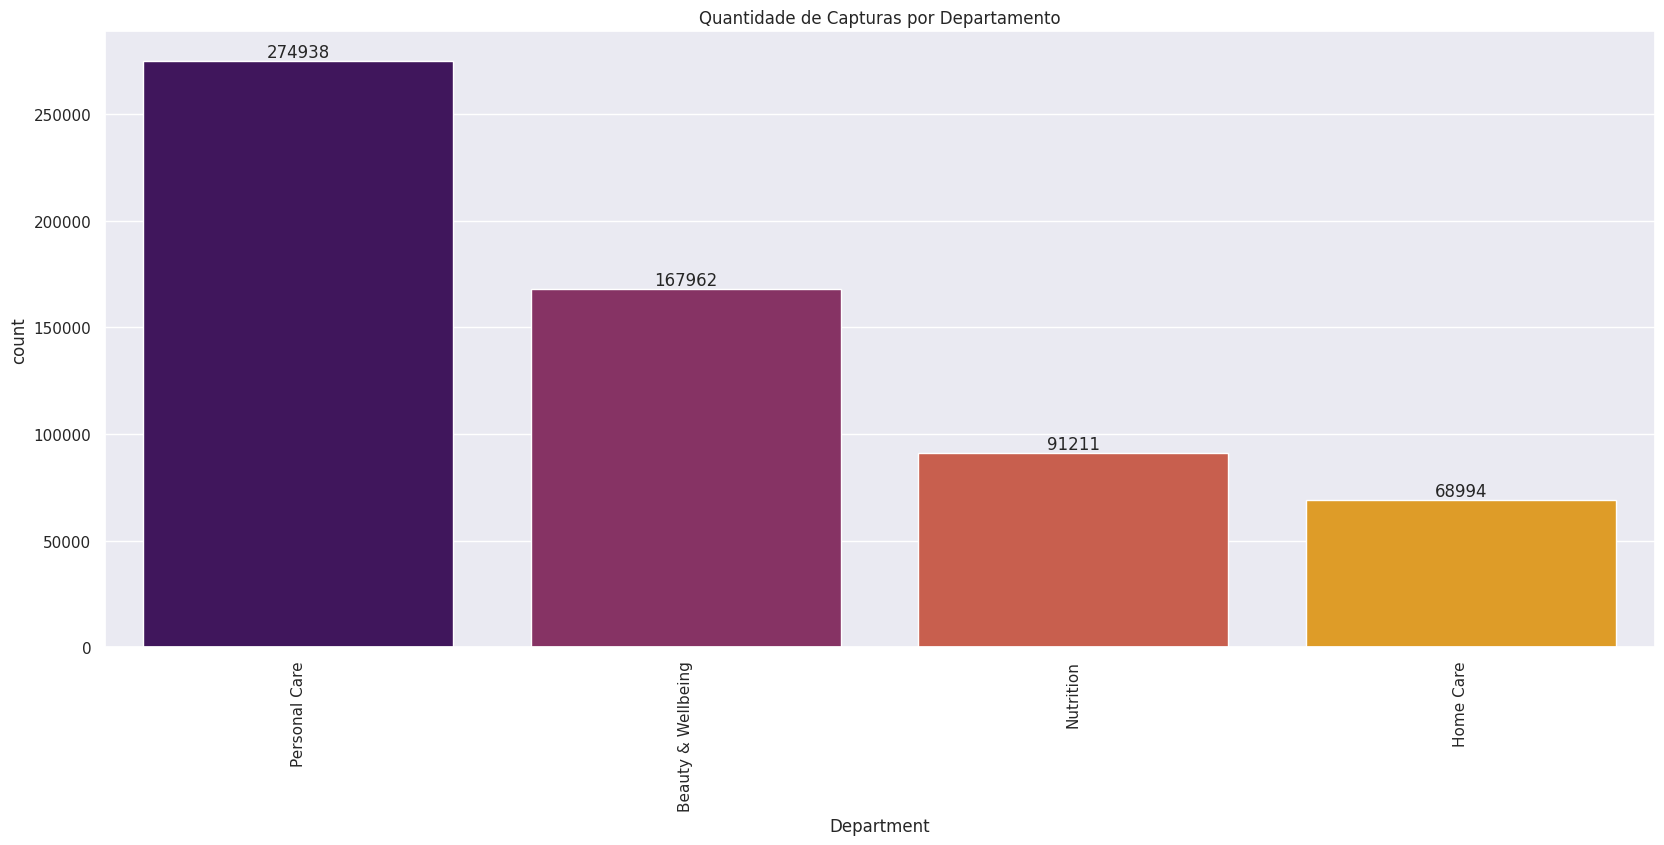

In [421]:
ax = sns.countplot(data=df_Unilever,x='Department',order=df_Unilever.loc[:,'Department'].value_counts().index,palette="inferno")
valores = df_Unilever.loc[:,'Department'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=valores)
plt.xticks(rotation=90)
plt.title('Quantidade de Capturas por Departamento')
plt.show()

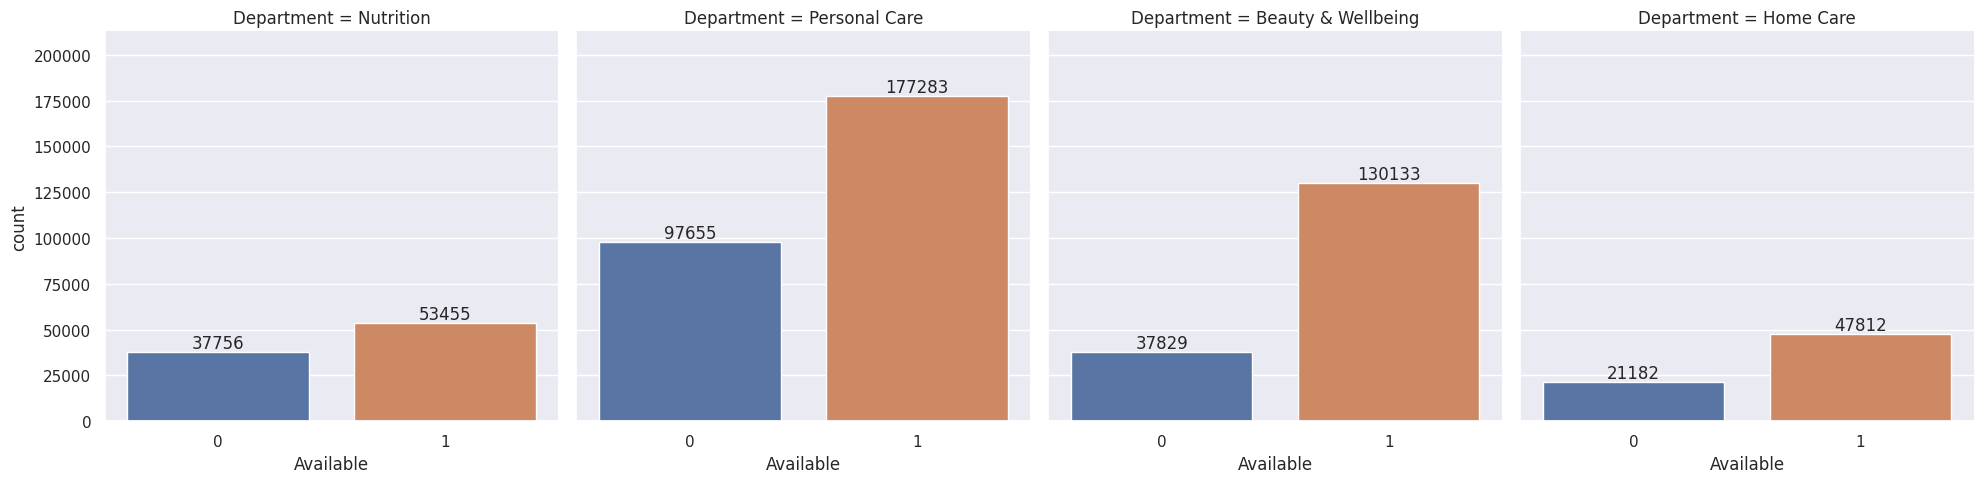

In [422]:
g = sns.catplot( data=df_Unilever,x="Available", col="Department",kind="count")
for ax in g.axes.ravel():
    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}' for v in c]
        ax.bar_label(c, labels=labels)
    ax.margins(y=0.2)
plt.show()

Comparativamente falando o departamento **Nutrition** é o que possui a maior porcentagem de capturas com produtos indisponíveis, e a **Beauty e Wellbing** a que possui maior porcentagem disponível. O que pode indicar que os produtos da categoria **Nutrition** esgotam mais rápido por causa do preço ou não precisam ser repostos rapitadamente

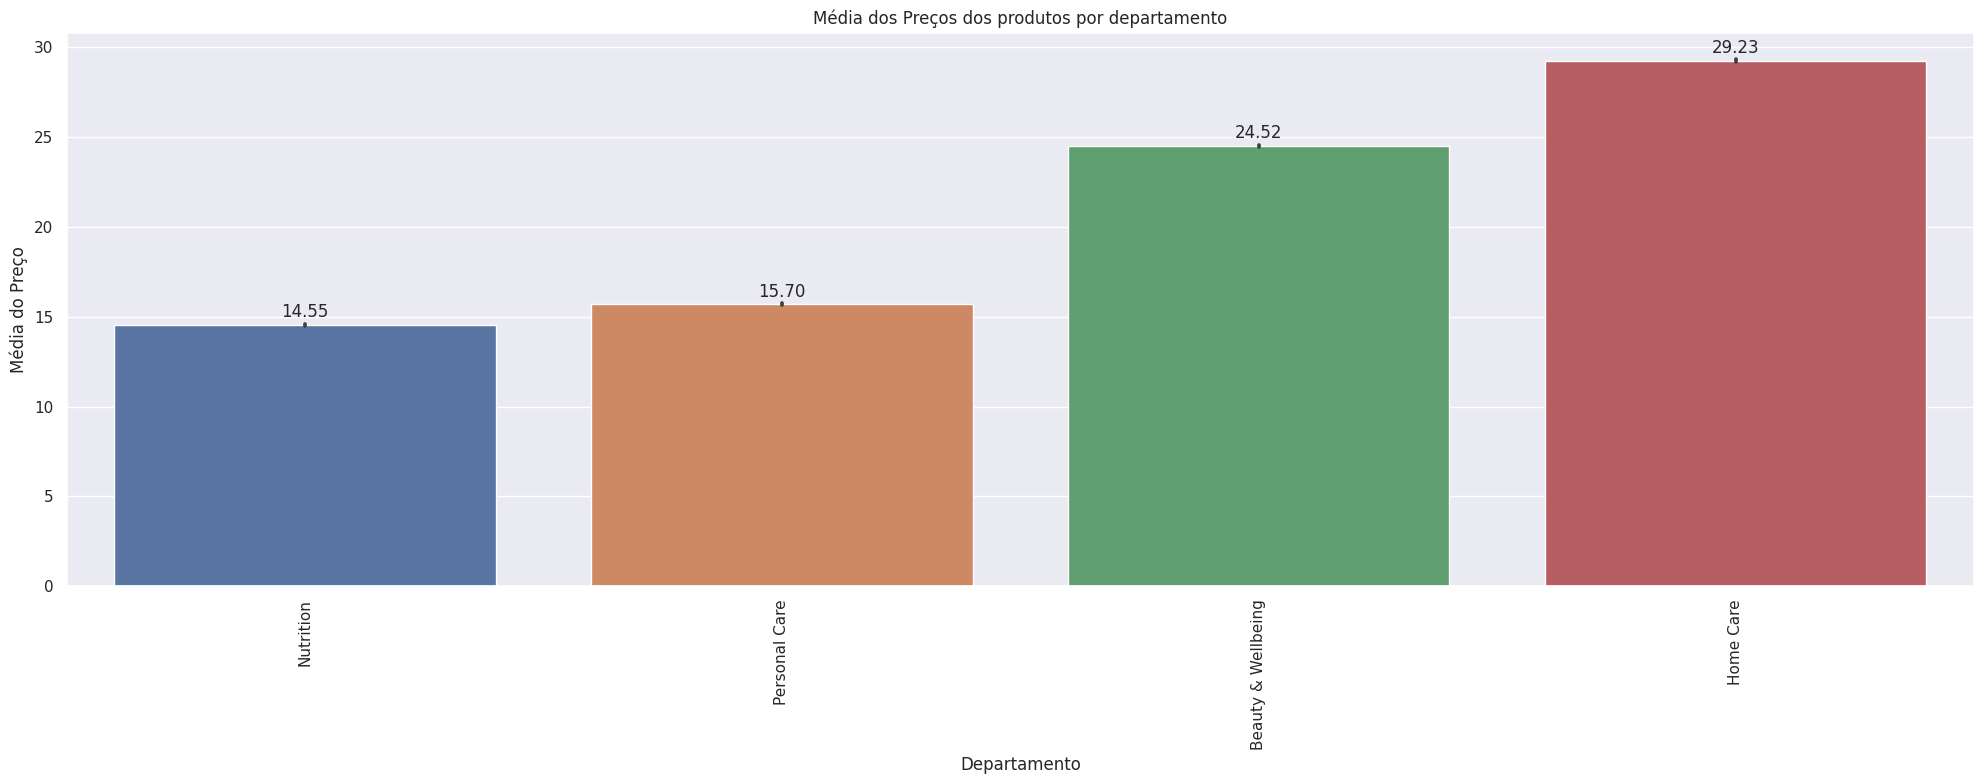

In [424]:
ax = sns.barplot(data=df_Unilever,x='Department', y='FinalPrice',estimator='mean')
plt.xlabel('Departamento')
plt.ylabel('Média do Preço')
plt.title('Média dos Preços dos produtos por departamento')

#Código para colocar os rotulos nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.xlabel('Departamento')
plt.ylabel('Média do Preço')
plt.title('Preço médio dos produtos por departamento')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.show()

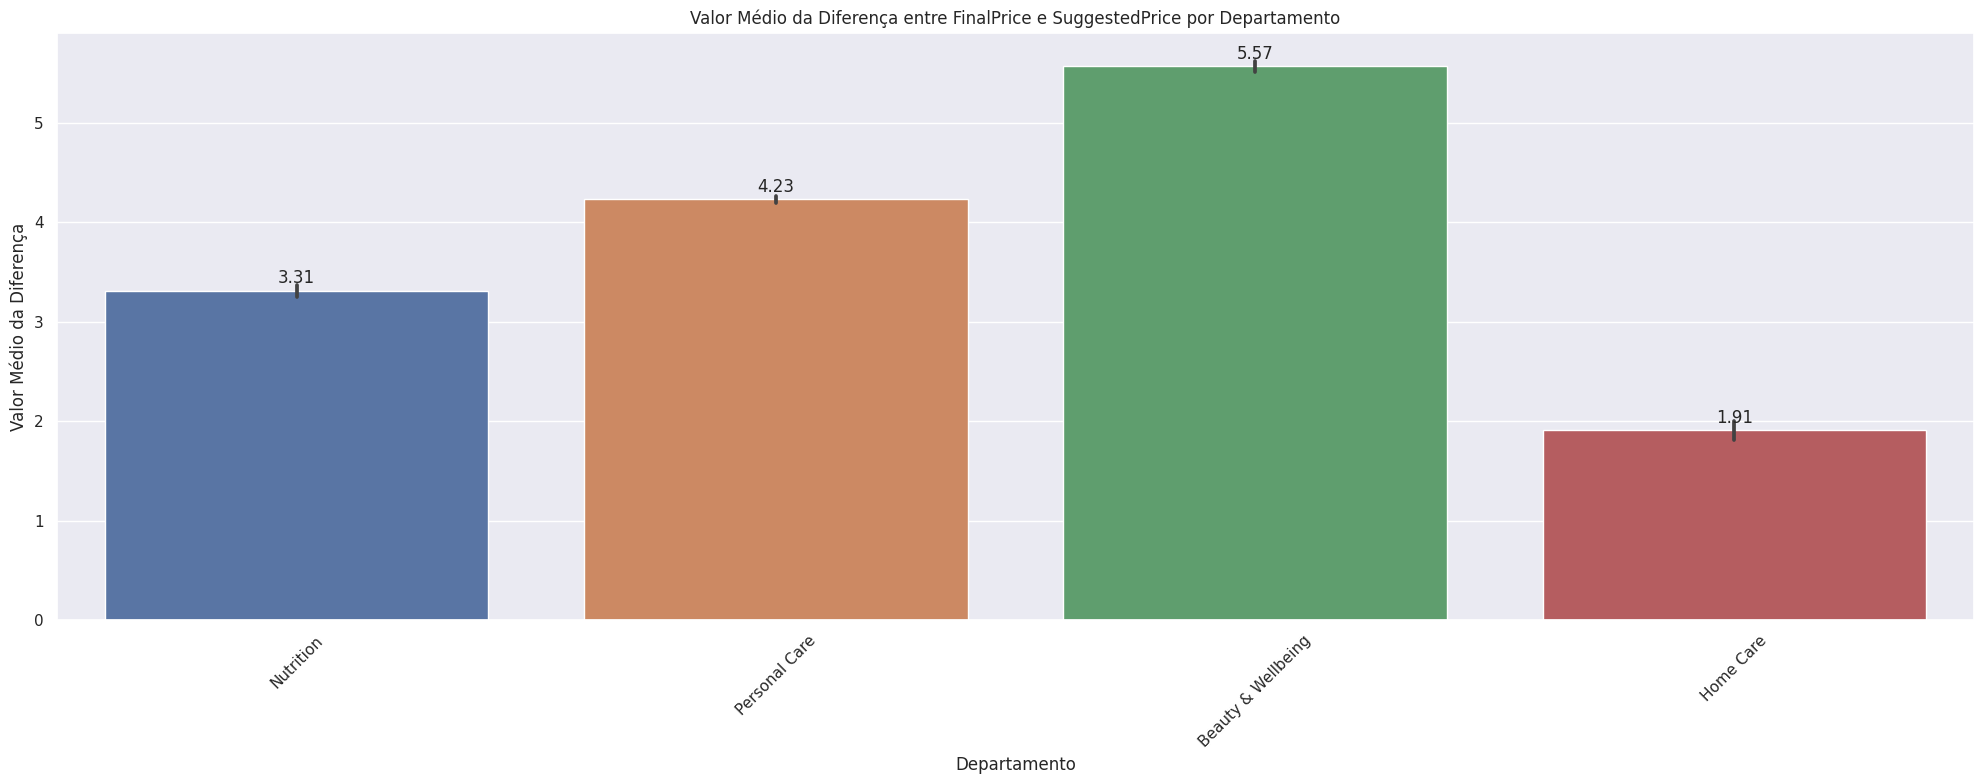

In [425]:
df_temporario = df_Unilever.copy()

df_temporario['Diferenca_Preco'] = df_temporario['FinalPrice'] - df_temporario['SuggestedPrice']

ax = sns.barplot(data=df_temporario, x='Department', y='Diferenca_Preco',estimator='mean')

#Código para colocar os rotulos nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.title('Preço médio dos descontos sugeridos por produtos de cada Departamento')
plt.xlabel('Departamento')
plt.ylabel('Valor Médio da Diferença')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Após analisar os dois gráficos vistos acima, percebe-se mesmo os produtos do departamento Home care possuindo em média os mariores preços eles possuem os menores descontos sugeridos, o que pode indicar que os valroes finais estão proximos do ideal.

**São esses o insights que tirei por aqui, mas tem muitos mais insights extraidos no power bi por isso não fiz tantos gráficos aqui**

#**Modelo para Prevê se um produto estrá disponivel a partir do seu FinalPrice e SuggestedPrice**

In [541]:
with open('df_Unilever_tratado.pickle', 'rb') as pk:
    df_Unilever = pickle.load(pk)

In [444]:
df_Unilever.nunique()

DateIns                          61
Available                         2
SuggestedPrice                 2025
FinalPrice                     8901
MasterKey_RetailerProduct     10263
Customer                          1
Department                        5
Category                         20
Brand                            26
EAN                             373
Product                         373
Retailer                         43
Screenshot                   462978
dtype: int64

In [521]:
#Importando Bibliotecas necessaria na criação dos modelos de machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score,f1_score
from yellowbrick.classifier import ConfusionMatrix

In [522]:
# Selecionando os atributos previsores e a variável target
previsores = df_Unilever[['SuggestedPrice', 'FinalPrice']].values
classe = df_Unilever['Available']

Irei utilizar os atributos **SuggestedPrice e FinalPrice** como previsores e o atributo **Available** como target/classe

In [524]:
# Dividindo o conjunto de dados em treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size=0.2, random_state=42)

Treinando o modelo de Regressão Logistica

0.6770462854726789

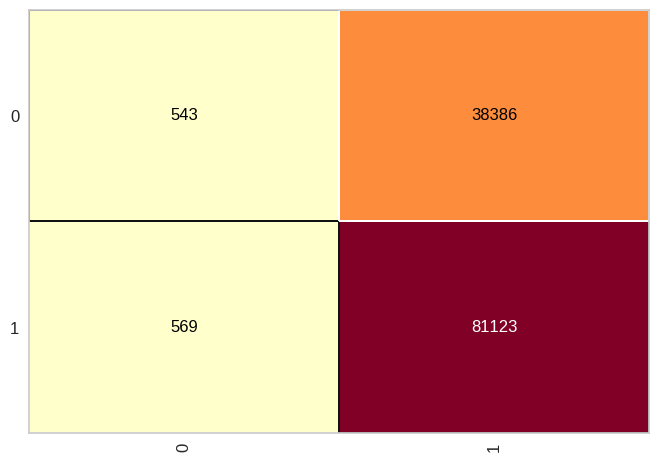

In [525]:
modelo_LGR = LogisticRegression(C=1.0, penalty='l2')

# Treinando o modelo
modelo_LGR.fit(X_treinamento, y_treinamento)

# Fazendo previsões no conjunto de teste
pred_LGR = modelo_LGR.predict(X_teste)

#Apresentando a matriz de confusão do modelo
cm = ConfusionMatrix(modelo_LGR)
cm.fit(X_treinamento,y_treinamento)
cm.score(X_teste,y_teste)

Treinando o modelo Random Forest

0.9371253761782774

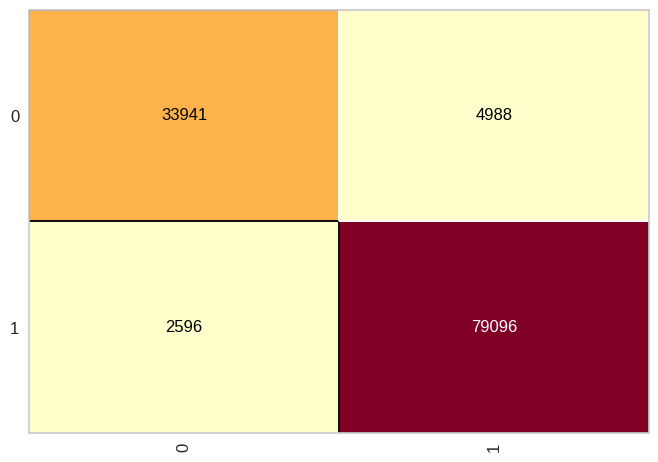

In [526]:
modelo_RFC = RandomForestClassifier(n_estimators=100, random_state=42)

modelo_RFC.fit(X_treinamento, y_treinamento)

pred_RFC = modelo_RFC.predict(X_teste)

cm = ConfusionMatrix(modelo_RFC)
cm.fit(X_treinamento,y_treinamento)
cm.score(X_teste,y_teste)

Treinando o modelo KNN

0.9288763979738188

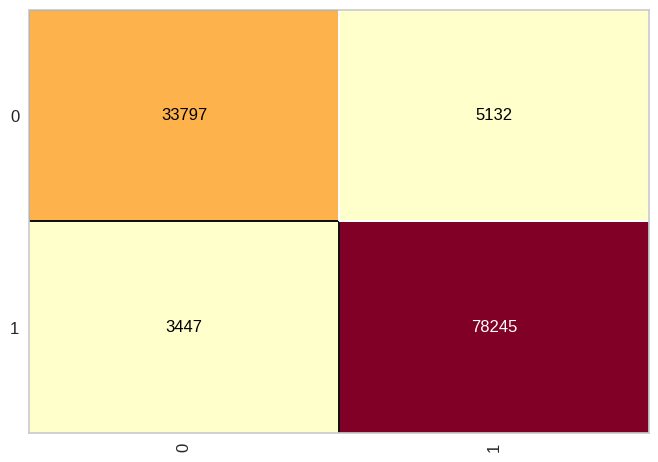

In [527]:
modelo_KNN = KNeighborsClassifier(n_neighbors=5)

modelo_KNN.fit(X_treinamento, y_treinamento)

pred_KNN = modelo_KNN.predict(X_teste)

cm = ConfusionMatrix(modelo_KNN)
cm.fit(X_treinamento,y_treinamento)
cm.score(X_teste,y_teste)

In [528]:
modelos = {'KNN': pred_KNN, 'Random Forest': pred_RFC, 'LogisticRegression': pred_LGR}

for modelo, previsoes in modelos.items():
    accuracy = accuracy_score(y_teste, previsoes)
    precision = precision_score(y_teste, previsoes)
    f1 = f1_score(y_teste, previsoes)
    print(f'Acurácia do modelo {modelo}: {accuracy:.3f}')
    print(f'Precisão do modelo {modelo}: {precision:.3f}')
    print(f'F1 Score do modelo {modelo}: {f1:.3f}\n')


Acurácia do modelo KNN: 0.929
Precisão do modelo KNN: 0.938
F1 Score do modelo KNN: 0.948

Acurácia do modelo Random Forest: 0.937
Precisão do modelo Random Forest: 0.941
F1 Score do modelo Random Forest: 0.954

Acurácia do modelo LogisticRegression: 0.677
Precisão do modelo LogisticRegression: 0.679
F1 Score do modelo LogisticRegression: 0.806



Após analisar todas as métricas podemos inferir que o algoritmo Random Forest é o Melhor para este situação

In [530]:
modelo_RFC.fit(X_treinamento, y_treinamento)
with open('modelo_RFC.pickle', 'wb') as p:
    pickle.dump(modelo_RFC, p)

Treinando e salvando o modelo escolhido!!!

**Pronto está foi minha limpeza e análise dos Dataset Coletas.csv e ProdutosVarejos que fiz usando meus conhecimentos, para mais insights e análises siga para o painel de bi criado a partir dos dados tratados aqui!!!**